In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #just imported so that no warning is showed 

In [2]:
data = pd.read_csv(r"C:\Users\neel-\Desktop\project\habermans-survival-data-set\haberman.csv") #reading the csv file as a dataframe
data.head() #displaying the first five records

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
names=['age','operated_year','axil_nodes','survival_status']
data.columns=names

In [4]:
data.shape

(305, 4)

In [5]:
data.columns

Index(['age', 'operated_year', 'axil_nodes', 'survival_status'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                305 non-null int64
operated_year      305 non-null int64
axil_nodes         305 non-null int64
survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
data['survival_status'].unique() #get unique values

array([1, 2], dtype=int64)

In [8]:
pd.value_counts(data.survival_status) #get count of unique values present in the survival column

1    224
2     81
Name: survival_status, dtype: int64

1 represents patient survived 5 year or longer. 2 stands for patients died within 5 years of operation

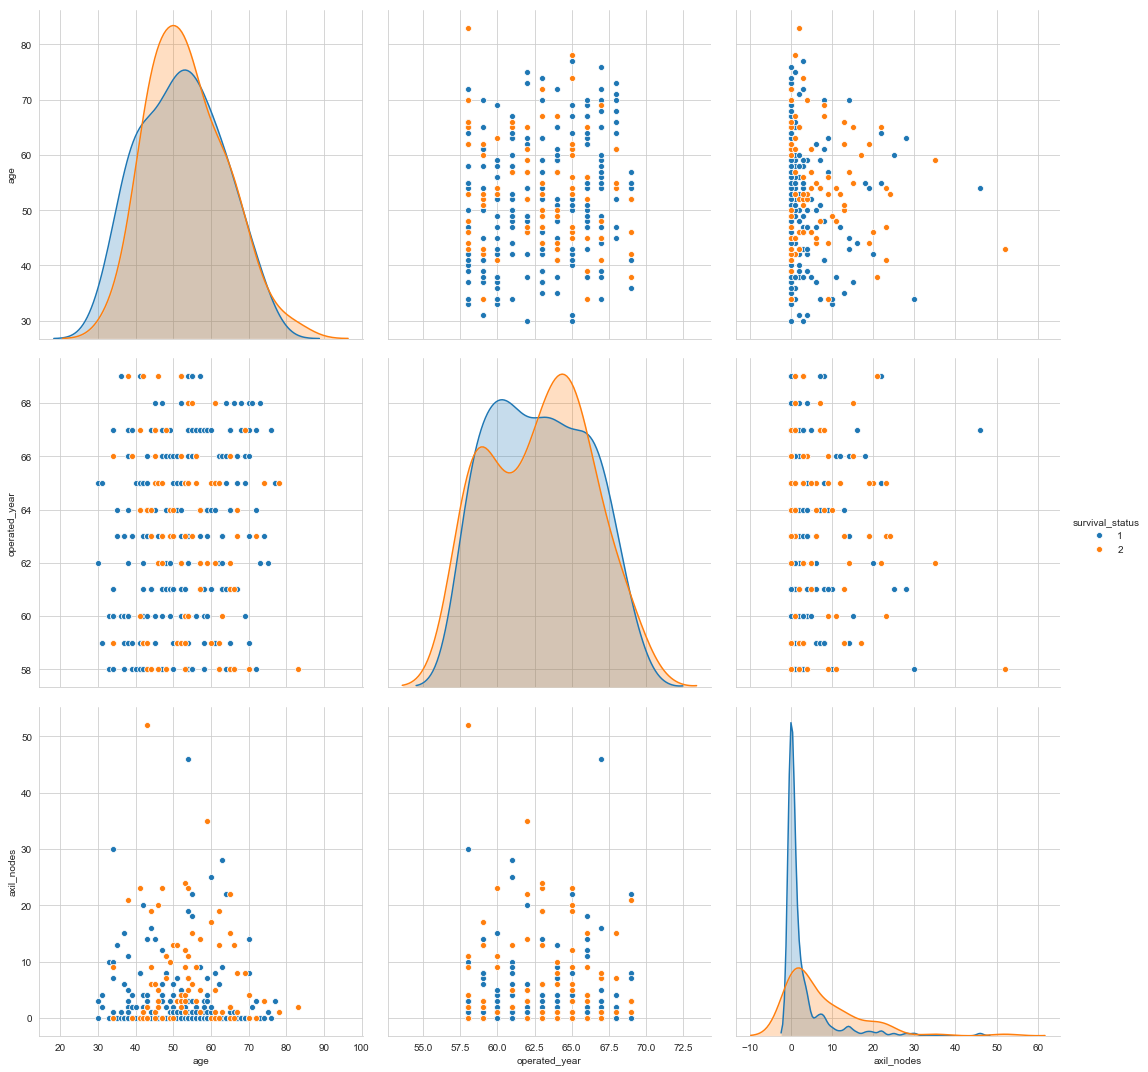

In [9]:
#2D scatter plot 
plt.close();
sns.set_style("whitegrid")
sns.pairplot(data, hue="survival_status",vars=['age', 'operated_year', 'axil_nodes'],height=5) #hue is color it by which label
plt.show()

In scaterr plot all combination of relationship between two distinct variable is displayed.
We defined 'vars' argument because the class label is taken as numerical value and not categoreical value. 

In univariate analysis below X-axis label denotes the value on the x axis corresponding to it and Y-axis is for the frequency

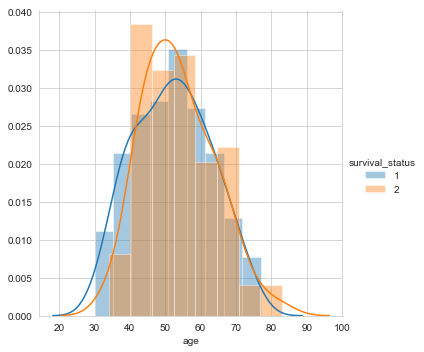

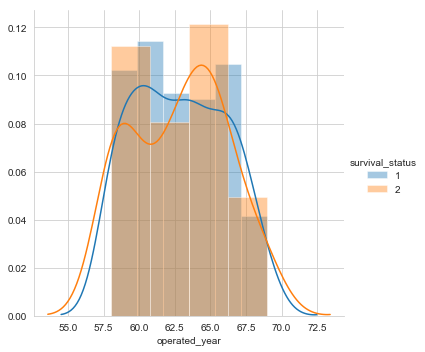

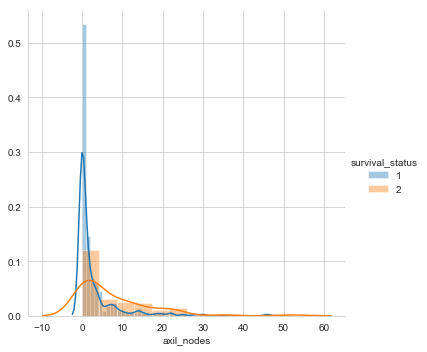

In [10]:
for i in (data.columns)[:-1]:
    fig = sns.FacetGrid(data, hue='survival_status', size=5)
    fig.map(sns.distplot, i).add_legend()
    plt.show()

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1:Q2 - 1.5*IQR (Whisker at the bottom)
2. Q2:25th percentile
3. Q3:50th percentile or median
4. Q4:75th percentile
5. Q5:Q4 + 1.5*IQR (Whisker at the top)
Inter Quartile Range = Q3 -Q1
Q5 and Q1 is 1.5*IQR in terms of absolute value as seaborn uses this factor to calculate whiskers. This is the reason we see some outliers as points outside the Q1 and Q5 range. In general to avoid this Q1 can be taken as min value and Q5 can be taken as max value.

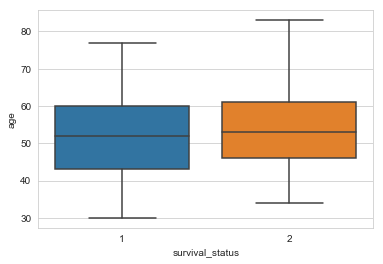

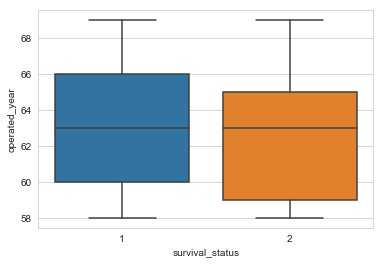

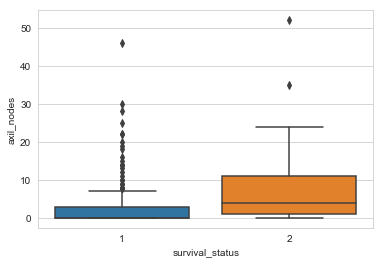

In [11]:
for i in (data.columns)[:-1]:
    sns.boxplot(x='survival_status',y=i,data=data)
    plt.show()

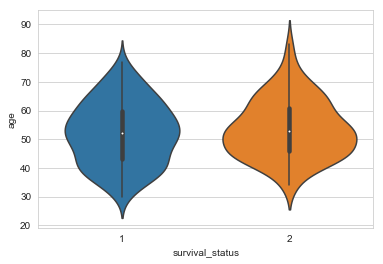

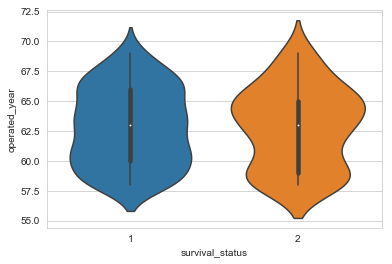

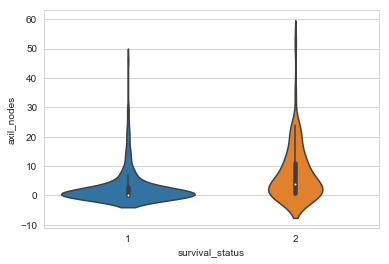

In [12]:
#Violin plot is the combination of probability density function(PDF) and box plot.
for i in (data.columns)[:-1]:
    sns.violinplot(x="survival_status",y=i,data=data,size=8)
    plt.show()

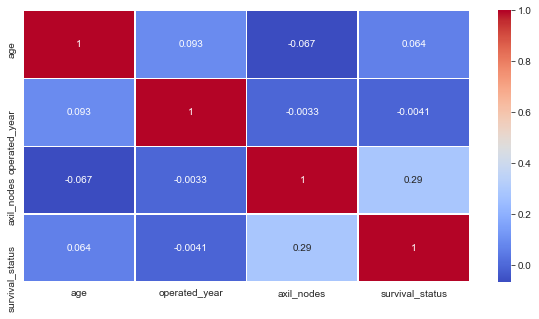

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

Observation: Simple EDA is not conclusive enough to witness any strong correlation betweel features and class labels.By looking at the graphs generated, all we can say is Class label is not lineraly seprable. Heatmap shows some correation between axil_nodes and survival_status.

One of the discrepancy can be seen in class labels category itself as '1' stands for people who lived for 5 or more years and '2' stands for person died within 5 years of being operated. A better parameter would have been cause of death as the person who lost their lives within 5 years may have some other reason as a contributing factor. Apart from this category '1' specificalls is confusing as person may or may not be alive so there is an uncertainty about the current status of the patients who belong to category '1'.